Forcepoint Data Science Technical Exam
=======================================================

Compose a System Chat Prediction Script
-------------------------------------

Your scripts should have the following usage in the [Unix] command line:

```
> python predict_system.py training_set.jsonl testing_noclass.jsonl
> python visualize_data.py training_set.jsonl
```

Your scripts should perform the following on the training and test sets:

1. Train a machine learning model to predict *System* class messages using the provided training set (training_set.jsonl). We are only interested in predicting whether a chatline is a *System* chat or not.

2. Use your trained model to predict whether the chat messages in testing_noclass.jsonl are *System* chats or not. Enrich the json records found in testing_noclass.jsonl in the following way:

   * Add an additional key called "class" to each record based on your prediction:

Predicted System Chat
```
      {
         "body": "hello world",
         ...
         "class": "System"
      }
```
Predicted Not System Chat
```
      {
         "body": "This is not a system chat",
         ...
         "class": "Not System"
      }

```
3. This role involves communicating technical details to business and project stakeholders regarding your model performance and efficacy. Create a script (visualize_data.py) that generates 2 PNG figures from the dataset.

   * A figure that informs us of how you performed feature selection / creation.

   * A figure that shows how you validated the performance of your model

   These plots should be geared towards a non-technical audience. You may also include a short write-up (a couple of paragraphs)further explaining your results.

Assessment
----------

Your solution will be assessed based on:

* how your plots convey your thought process while building and validating the model
* attention to detail
* completion of the tasks
* algorithm efficiency
* code readability
* adherence to common coding practices that best enable sharing, re-using, and
  extending the code.

<br>
<br>


# Data

A parsed version of the [NPS chat data](http://faculty.nps.edu/cmartell/npschat.htm) is included (.jsonl, adapted from the widely-used publicly available data set). The dataset has been divided into a training and test set.

Each json line in the jsonl file represents one chat message with the follwing keys:

* **body** - the text of chat message
* **chat_action** - a boolean whether an action was performed in the chat
* **class** - the type of chat message sent
* **participant_count** - the total number of participants in the chat room
* **participants** - a list of participants in the chat room
* **sender** - the sender of the chat message
* **tags** - a dictionary with keys being Part of Speech tags (POS) and the values as their respective words | [POS Tags](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html)
* **total_num_chats** - the total number of chat messages in the chat room where the chat message was sent to
* **users_tagged** - a list of users tagged by the sender of the chat message. If there are no tagged users, the record does not have this key
* **word_freq** - a dictionary of word counts from the chat message
* **age** - the age group of the sender
* **key** - a unique identifier

In [4]:
! ls Data/chat/Data

testing_noclass.jsonl  training_set.jsonl


In [81]:
! head Data/chat/Data/training_set.jsonl -n 2

{"body":"10-19-40sUser27 has a nice pic...but it won't be current if she keeps getting booted","chat_action":false,"class":"Statement","participant_count":55,"participants":["10-19-40sUser9","10-19-40sUser49","10-19-40sUser39","10-19-40sUser3","10-19-40sUser11","10-19-40sUser44","10-19-40sUser47","10-19-40sUser54","10-19-40sUser30","10-19-40sUser33","10-19-40sUser35","10-19-40sUser14","10-19-40sUser34","10-19-40sUser21","10-19-40sUser37","10-19-40sUser51","10-19-40sUser46","10-19-40sUser19","10-19-40sUser55","10-19-40sUser20","10-19-40sUser31","10-19-40sUser38","10-19-40sUser1","10-19-40sUser40","10-19-40sUser27","10-19-40sUser53","10-19-40sUser24","10-19-40sUser13","10-19-40sUser6","10-19-40sUser41","10-19-40sUser7","10-19-40sUser42","10-19-40sUser4","10-19-40sUser58","10-19-40sUser2","10-19-40sUser45","10-19-40sUser25","10-19-40sUser16","10-19-40sUser50","10-19-40sUser23","10-19-40sUser8","10-19-40sUser56","10-19-40sUser48","10-19-40sUser29","10-19-40sUser57","10-19-40sUser43","10-19

In [8]:
import pandas as pd
import os
import json

In [4]:
filename = os.getcwd()+"/Data/chat/Scripts/Data/training_set.jsonl"

In [5]:
with open(filename) as file:
    data = file.read() 

In [6]:
tmp = data.replace('\n  ','').replace('}\n{','},{').replace('\n','')
tmp1 = '['+tmp+']'

In [9]:
df = pd.DataFrame( json.loads(tmp1) )

In [10]:
df.head(3)

,age,body,chat_action,class,key,participant_count,participants,sender,tags,total_num_chats,users_tagged,word_freq
0,40,10-19-40sUser27 has a nice pic...but it won't ...,False,Statement,a713ffe9869bd2a285c469ac03953b08,55,"[10-19-40sUser9, 10-19-40sUser49, 10-19-40sUse...",10-19-40sUser3,"{'NNP': '10-19-40sUser27', 'VBZ': 'keeps', 'DT...",686,[10-19-40sUser27],"{'10-19-40sUser27': 1, 'has': 1, 'a': 1, 'nice..."
1,40,haha,False,Emotion,733611da75934e8d3aa0c8cd4792c102,50,"[10-24-40sUser0, 10-24-40sUser40, 10-24-40sUse...",10-24-40sUser35,{'UH': 'haha'},706,None,{'haha': 1}
2,teen,"lol, the place where I used to work had everyt...",False,Statement,b3b69d62ccf0af257652727dcce5416f,136,"[10-26-teensUser110, 10-26-teensUser143, 10-26...",10-26-teensUser66,"{'UH': 'lol', ',': ',', 'DT': 'the', 'NN': 'ev...",706,None,"{'lol': 1, ',': 1, 'the': 1, 'place': 1, 'wher..."


In [11]:
df = df.rename(columns={'class': 'Target'})

In [12]:
df['Target'].value_counts()[0:5]

Statement     2551
Greet         1079
Emotion        889
System         483
ynQuestion     435
Name: Target, dtype: int64

In [13]:
df['Target_bin'] = 0
df.loc[df.Target == 'System','Target_bin'] = 1

In [16]:
df.shape

(6823, 13)

In [20]:
tmp = df.iloc[:,[0,1,2,5,9,6,8,10,11,12]]
tmp.loc[tmp.Target_bin == 1,].head(3)
#tmp.loc[(tmp.chat_action == True) & (tmp.Target_bin == 0),]   #RULE
#tmp.body[28]

,age,body,chat_action,participant_count,total_num_chats,participants,tags,users_tagged,word_freq,Target_bin
5,20,That's the way 11-09-20sUser163..,False,126,706,"[11-09-20sUser101, 11-09-20sUser163, 11-09-20s...","{'DT': 'the', 'BES': ''s', 'NN': 'way', 'NNP':...",[11-09-20sUser163],"{'That': 1, ''s': 1, 'the': 1, 'way': 1, '11-0...",1
17,40,.ACTION checks sumpin.,True,50,706,"[10-24-40sUser0, 10-24-40sUser40, 10-24-40sUse...","{'SYM': '.', 'NN': 'sumpin', 'VBZ': 'checks', ...",None,"{'.': 2, 'ACTION': 1, 'checks': 1, 'sumpin': 1}",1
20,40,.ACTION never judges a book by it's cover....l...,True,55,686,"[10-19-40sUser9, 10-19-40sUser49, 10-19-40sUse...","{'SYM': '.', 'NN': 'inside', 'RB': 'too', 'VBZ...",None,"{'.': 2, 'ACTION': 1, 'never': 1, 'judges': 1,...",1


In [21]:
res1 = tmp.loc[tmp.chat_action == True,]

In [66]:
tmp2 = tmp#.loc[tmp.chat_action == False,]
tmp3 = tmp2['word_freq'].apply(pd.Series)
tmp3['Target_bin'] = tmp2['Target_bin']
tmp3.groupby('Target_bin').agg({'has':sum})
cols = tmp3.columns[:-1]
tmp4 = tmp3.groupby('Target_bin')[cols].sum()
tmp5 = tmp4.transpose()
tmp5['diff'] = tmp5[1] - tmp5[0]
res2 = tmp5.sort_values(by=['diff'], ascending=False)

In [67]:
res2.iloc[:10,]

Target_bin,0,1,diff
.,314.0,717.0,403.0
ACTION,0.0,280.0,280.0
:,9.0,67.0,58.0
10-26-teensUser54,0.0,42.0,42.0
MODE,0.0,33.0,33.0
@,17.0,42.0,25.0
#14-19teens,0.0,25.0,25.0
10-26-teensUser122,2.0,25.0,23.0
+,1.0,24.0,23.0
o,12.0,33.0,21.0


In [68]:
res2['tokens'] = res2.index
res3 = res2.iloc[:10,]
res3.drop(['diff'], inplace=True, axis=1)

In [69]:
df2 = pd.melt(res3, id_vars=["tokens"], 
                  var_name="Class", value_name="Value")
df2.head(3)

,tokens,Class,Value
0,.,0,314.0
1,ACTION,0,0.0
2,:,0,9.0


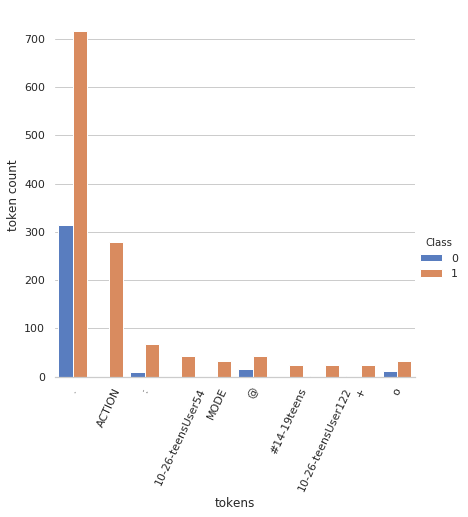

In [70]:
import seaborn as sns
sns.set(style="whitegrid")
g = sns.catplot(x="tokens", y="Value", hue="Class", data=df2, height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("token count")
g.set_xticklabels(rotation=65)

In [71]:
g.savefig('features_selection.png') 

# Model

In [297]:
tmp2 = tmp #.loc[tmp.chat_action == False,]     <= use all records for training, but remove after prediction
tmp3 = tmp2['word_freq'].apply(pd.Series)
#tmp3['Target_bin'] = tmp2['Target_bin']
tmp3.fillna(0, inplace=True)

In [282]:
print(  tmp3.shape  )
print(  (tmp3.loc[tmp3.Target_bin==1,]).shape )
print(  (tmp3.loc[tmp3.Target_bin==0,]).shape )

(6823, 5654)
(483, 5654)
(6340, 5654)


In [283]:
System = tmp3.loc[tmp3.Target_bin==1,]
recs = System.shape[0]
NotSystem = tmp3.loc[tmp3.Target_bin==0,].sample(n=recs, replace=True, random_state=1)
tmp4 = pd.concat([System, NotSystem]).reset_index(drop=True)

In [284]:
print( tmp4.shape )
print( tmp4.Target_bin.value_counts() )

(966, 5654)
1    483
0    483
Name: Target_bin, dtype: int64


In [285]:
from sklearn.model_selection import train_test_split
X = tmp4.loc[:, tmp4.columns != 'Target_bin']
y = tmp4['Target_bin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [286]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())
                    ])
#text_clf = text_clf.fit(X_train, y_train)

import numpy as np
predicted = text_clf.predict(X_test)
np.mean(predicted == y_test)

In [287]:
from sklearn.model_selection import GridSearchCV
parameters = {'tfidf__use_idf': (True, False),
              'clf__alpha': (1e-2, 1e-3)
             }

In [288]:
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1, cv=5)
gs_clf = gs_clf.fit(X_train, y_train)

In [289]:
predicted = gs_clf.predict(X_test)
print( np.mean(predicted == y_test) )
print( np.std(predicted == y_test) )

0.9123711340206185
0.2827543948845872


In [290]:
print( gs_clf.best_score_ )
print( gs_clf.best_params_ )

0.9339378238341969
{'clf__alpha': 0.01, 'tfidf__use_idf': False}


<br>

__See of rule-base classifier helps__

In [336]:
tmp5 = tmp
y_pred_clf = gs_clf.predict(tmp3)
tmp5 = tmp5.assign(e=pd.Series(y_pred_clf).values)
tmp5['y_pred_rule'] = 0
tmp5.loc[tmp5.chat_action == True, ['y_pred_rule'] ] = 1

tmp5['y_pred'] = tmp5['y_pred_clf']
tmp5.loc[tmp5.chat_action == True, ['y_pred'] ] = 1

In [344]:
print( np.mean(tmp5.y_pred_clf == tmp5.Target_bin) )
print( np.std(tmp5.y_pred_clf == tmp5.Target_bin) )

print("no - it doesn't improve")
print( np.mean(tmp5.y_pred == tmp5.Target_bin) )
print( np.std(tmp5.y_pred == tmp5.Target_bin) )

0.8881723582002052
0.3151542802014461
no - it doesn't improve
0.8881723582002052
0.3151542802014461


In [339]:
tmp5[['y_pred_rule','y_pred_clf','Target_bin','y_pred']].head(5)

,y_pred_rule,y_pred_clf,Target_bin,y_pred
0,0,1,0,1
1,0,0,0,0
2,0,0,0,0
3,0,1,0,1
4,0,0,0,0


# Predict

In [ ]:
gs_clf.predict(X_test)

In [352]:
tmp3.columns

Index(['10-19-40sUser27', 'has', 'a', 'nice', 'pic', '...', 'but', 'it', 'wo',
       'n't',
       ...
       'DOES', 'middle', '******', 'filthy', 'jucilicious', 'vodka', 'coast',
       'j/p', 'mac', 'davis'],
      dtype='object', length=5653)

In [354]:
A = set( ['a', 'b', 'c', 'd'] )
B = set( ['c', 'f', 'g'] )

# Equivalent to A-B
print(A.difference(B))

{'a', 'd', 'b'}
